In [3]:
!unzip Covid19



Archive:  Covid19.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-f

  inflating: CovidDataset/Train/Normal/IM-0563-0001.jpeg  
  inflating: CovidDataset/Train/Covid/ae6c954c0039de4b5edee53865ffee43-e6c8-0.jpg  
  inflating: CovidDataset/Val/Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png  
  inflating: CovidDataset/Train/Covid/gr1_lrg-a.jpg  
  inflating: CovidDataset/Train/Normal/IM-0564-0001.jpeg  
  inflating: CovidDataset/Train/Normal/NORMAL2-IM-0499-0001.jpeg  
  inflating: CovidDataset/Train/Covid/16663_1_1.jpg  
  inflating: CovidDataset/Train/Covid/extubation-8.jpg  
  inflating: CovidDataset/Train/Covid/paving.jpg  
  inflating: CovidDataset/Train/Normal/IM-0529-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0425-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0439-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0491-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0337-0001.jpeg  
  inflating: CovidDataset/Train/Covid/all14238-fig-0001-m-b.jpg  
  inflating: CovidDataset/Train/Covid/covid-19-infection-exclusive-gastroin

  inflating: CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: CovidDataset/Train/Covid/ciaa199.pdf-001-c.png  
  inflating: CovidDataset/Train/Covid/extubation-4.jpg  
  inflating: CovidDataset/Train/Normal/IM-0556-0001.jpeg  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png  
  inflating: CovidDataset/Train/Covid/covid-19-pneumonia-19.jpg  
  inflating: CovidDataset/Train/Normal/IM-0392-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0530-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0261-0001.jpeg  
  inflating: CovidDataset/Train/Covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0525-0001.jpeg  
  inflating: CovidDataset/Train/Covid/lancet-case2a.jpg  
  inflating: CovidDataset/Train/Covid/ciaa199.pdf-001-b.png  
  inflating: CovidDataset/Train/Normal/NORMAL2-IM-0941-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0488-0001.jpeg  
  inflati

In [25]:
Train_path="CovidDataset/Train"
val_path="CovidDtataset/Val"

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import keras
from keras.layers import *
from keras.models import *
from keras_preprocessing import image


In [30]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))


In [31]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])

In [13]:
train_datagen=image.ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=image.ImageDataGenerator(
    rescale=1.0/255.0
)


In [33]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(train_generator,
                         steps_per_epoch=8,
                         epochs=8,
                         validation_data=test_generator,
                         validation_steps=2)

Epoch 1/8
8/8 [==============================] - 53s 7s/step - loss: 0.8820 - accuracy: 0.5469 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 2/8
8/8 [==============================] - 62s 8s/step - loss: 0.5794 - accuracy: 0.6836 - val_loss: 0.5439 - val_accuracy: 0.6833
Epoch 3/8
8/8 [==============================] - 63s 8s/step - loss: 0.3020 - accuracy: 0.8672 - val_loss: 0.2719 - val_accuracy: 0.9500
Epoch 4/8
2/8 [======>.......................] - ETA: 44s - loss: 0.3983 - accuracy: 0.8750

In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [18]:
model.save('bestmodel'+'.h5')

In [19]:
model=load_model("bestmodel.h5")

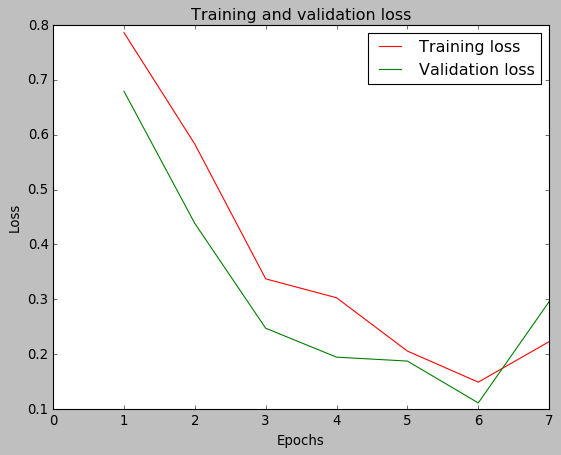

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.style.use("classic")
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,7)
plt.legend()
plt.show()

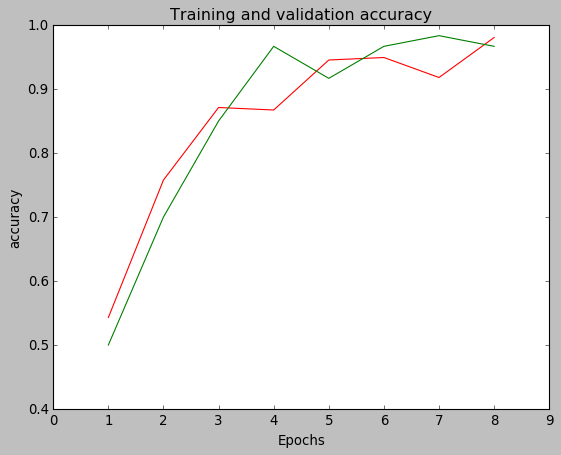

In [21]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.style.use("classic")
plt.plot(epochs, loss, color='red',)
plt.plot(epochs, val_loss, color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim(0.4,1)
plt.xlim(0,9)

plt.show()

In [22]:
import os

In [24]:
pr=[]
for f in os.listdir("CovidDataset/Val/Normal"):
    p=os.path.join("CovidDataset/Val/Normal",f)
    a=pri.predict(p)
    if(a>0.5):
        a=1
    else:
        a=0    
    pr.append(a)

NameError: name 'pri' is not defined

In [66]:
for f in os.listdir("CovidDataset/Val/Covid"):
    p=os.path.join("CovidDataset/Val/Covid",f)
    a=model.predict(p)
    if(a>0.5):
        a=1
    else:
        a=0    
    pr.append(a)

In [46]:
y=[]
for i in range(30):
    y.append(1)

In [47]:

for i in range(30):
    y.append(0)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y,pr) 


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

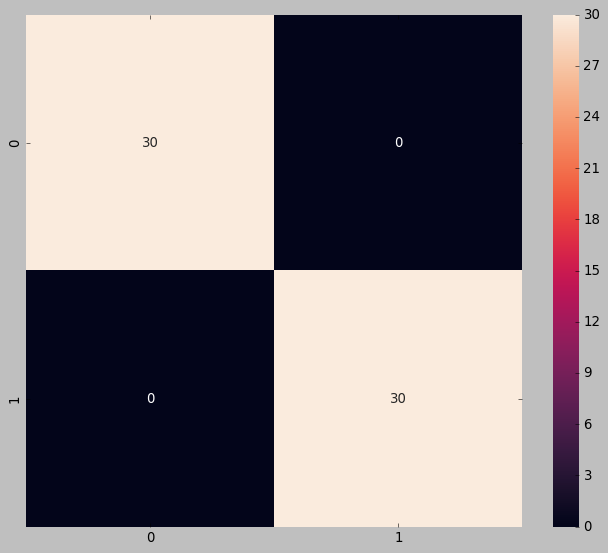

In [56]:
plt.figure(figsize=(10,8))
plt.style.use("classic")
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [17]:
x="1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png"

In [19]:
a=image.load_img("1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png",target_size=((224,224)))
a=image.img_to_array(a)
a=a.reshape((1,224,224,3))
a=a/255.0

In [20]:
X=a

In [22]:
model=load_model("bestmodel.h5")

In [32]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    plt.style.use("classic")
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            ax[row][col].axis("off")
            activation_index += 1

output from layer 2


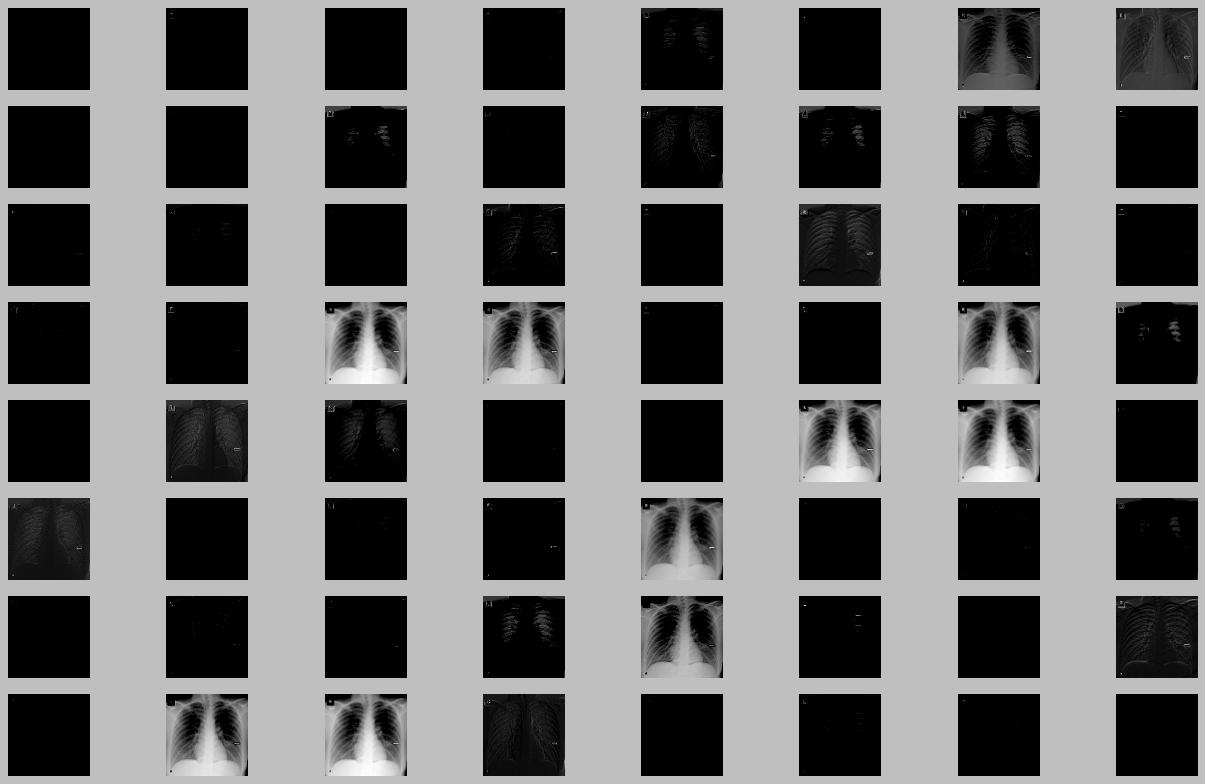

In [50]:
print("output from layer 2")
display_activation(activations, 8, 8, 1)


output from  layer 4


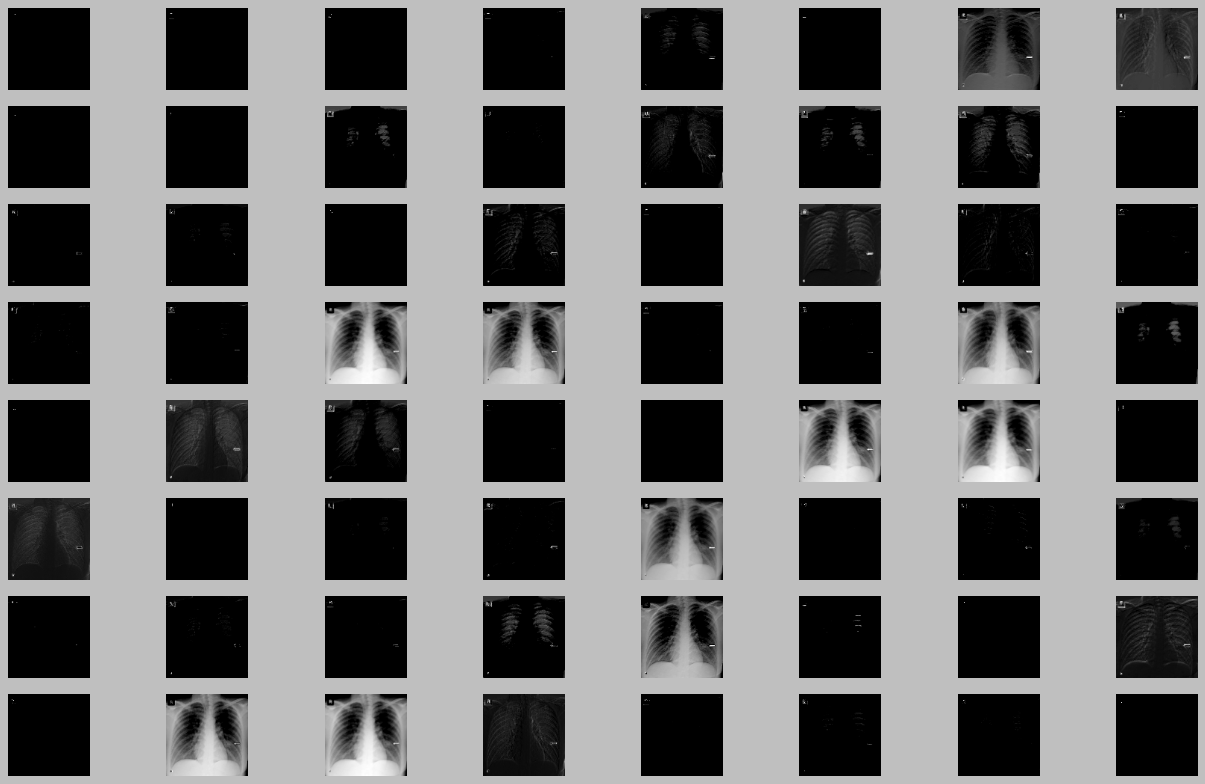

In [51]:
print("output from  layer 4")
display_activation(activations, 8, 8, 3)

output from  layer 8


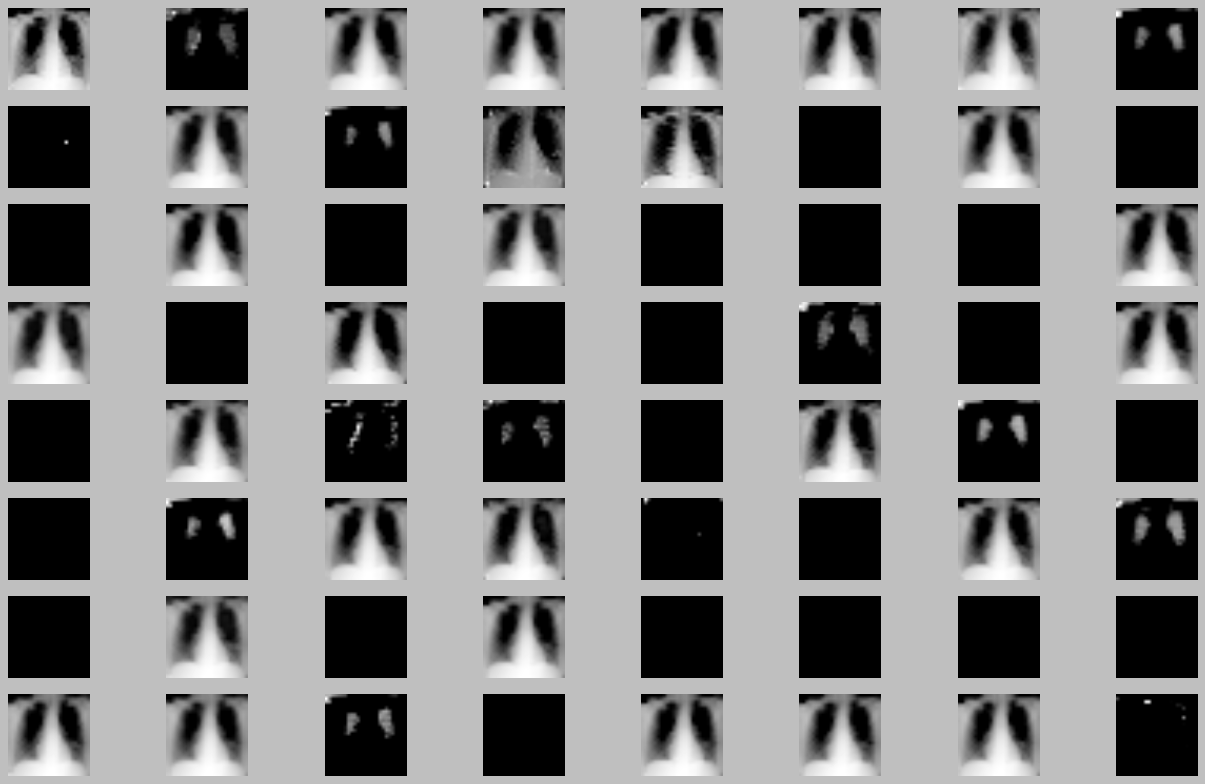

In [52]:
print("output from  layer 8")
display_activation(activations, 8, 8, 8)

chest xray of covid patient


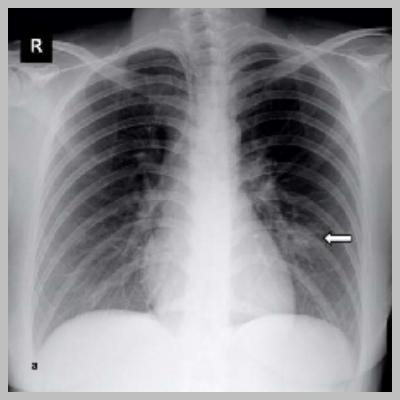

In [48]:
X=X.reshape((224,224,3))
print("chest xray of covid patient")
plt.axis("off")
plt.imshow(X)
plt.show()

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       